In [2]:
from apportionment import *


In [3]:
def show2023(axs):
    year = 2023
    df = pd.read_csv(f"./vis_data/unweighted-vis-1m-{year}.csv")


    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=200, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x

    axs[0].plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    axs[0].plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.02 % of voters)")
    axs[0].plot(x, y * 0, label='Linear trend')

    axs[0].set_ylabel('Influence of a particular voter')
    axs[0].set_title(f'Year {year}')

    axs[0].set_yticks([])

    # max_index = y_rolling[:3000].idxmax()
    # axs[0].annotate(f'Peek location: {int(max_index * (constants.all_voters[int(year)] / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
    #                 xytext=(0.7, 0.01),
    #                 arrowprops=dict(facecolor='black', arrowstyle='->'))

    # max_index = y_rolling.idxmax()
    # axs[0].annotate(f'Peek location: {int(max_index * (constants.all_voters[int(year)] / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
    #                 xytext=(1.8, 0.01),
    #                 arrowprops=dict(facecolor='black', arrowstyle='->'))

In [4]:
def show2020(axs):
    year = 2020
    df = pd.read_csv(f"./vis_data/unweighted-vis-1m-{year}.csv")


    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=200, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x

    axs[1].plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    axs[1].plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.02 % of voters)")
    axs[1].plot(x, y * 0, label='Linear trend')

    axs[1].set_title(f'Year {year}')

    axs[1].set_yticks([])

    # max_index = y_rolling[:1000].idxmax()
    # axs[1].annotate(f'Peek location: {int(max_index * (constants.all_voters[int(year)] / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
    #                 xytext=(0.2, 0.05),
    #                 arrowprops=dict(facecolor='black', arrowstyle='->'))

    # max_index = y_rolling[1500:3000].idxmax()
    # axs[1].annotate(f'Peek location: {int(max_index * (constants.all_voters[int(year)] / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
    #                 xytext=(0.6, 0.04),
    #                 arrowprops=dict(facecolor='black', arrowstyle='->'))

    # max_index = y_rolling[3000:12000].idxmax()
    # axs[1].annotate(f'Peek location: {int(max_index * (constants.all_voters[int(year)] / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
    #                 xytext=(0.8, 0.02),
    #                 arrowprops=dict(facecolor='black', arrowstyle='->'))

    # max_index = y_rolling[12000:15000].idxmax()
    # axs[1].annotate(f'Peek location: {int(max_index * (constants.all_voters[int(year)] / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
    #                 xytext=(1.8, 0.03),
    #                 arrowprops=dict(facecolor='black', arrowstyle='->'))

    # max_index = y_rolling[13000:15000].idxmax()
    # axs[1].annotate(f'Peek location: {int(max_index * (constants.all_voters[int(year)] / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
    #                 xytext=(2.0, 0.01),
    #                 arrowprops=dict(facecolor='black', arrowstyle='->'))

In [5]:
def show2016(axs): 
    year = 2016
    df = pd.read_csv(f"./vis_data/unweighted-vis-1m-{year}.csv")


    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=200, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x

    axs[2].plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    axs[2].plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.02 % of voters)")
    axs[2].plot(x, y * 0, label='Linear trend')

    axs[2].set_xlabel('size of organised group (%)')
    axs[2].set_ylabel('Influence of a particular voter')
    axs[2].set_title(f'Year {year}')

    axs[2].set_yticks([])

    # max_index = y_rolling[:3000].idxmax()
    # axs[2].annotate(f'Peek location: {int(max_index * (constants.all_voters[int(year)] / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
    #                 xytext=(0.6, 0.01),
    #                 arrowprops=dict(facecolor='black', arrowstyle='->'))

    # max_index = y_rolling[3000:28000].idxmax()
    # axs[2].annotate(f'Peek location: {int(max_index * (constants.all_voters[int(year)] / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
    #                 xytext=(1.3, 0.02),
    #                 arrowprops=dict(facecolor='black', arrowstyle='->'))

    # max_index = y_rolling[28000:40000].idxmax()
    # axs[2].annotate(f'Peek location: {int(max_index * (constants.all_voters[int(year)] / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
    #                 xytext=(1.3, 0.03),
    #                 arrowprops=dict(facecolor='black', arrowstyle='->'))

In [6]:
def show2012(axs):
    year = 2012

    df = pd.read_csv(f"./vis_data/unweighted-vis-1m-{year}.csv")


    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=200, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x
    
    axs[3].plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    axs[3].plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.02 % of voters)")
    axs[3].plot(x, y * 0, label='Linear trend')

    axs[3].set_xlabel('size of organised group (%)')
    axs[3].set_title(f'Year {year}')

    axs[3].set_yticks([])

    # max_index = y_rolling[:3000].idxmax()
    # axs[3].annotate(f'Peek location: {int(max_index * (constants.all_voters[int(year)] / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
    #                 xytext=(0.7, 0.02),
    #                 arrowprops=dict(facecolor='black', arrowstyle='->'))

    # max_index = y_rolling[3000:].idxmax()
    # axs[3].annotate(f'Peek location: {int(max_index * (constants.all_voters[int(year)] / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
    #                 xytext=(1.8, 0.01),
    #                 arrowprops=dict(facecolor='black', arrowstyle='->'))

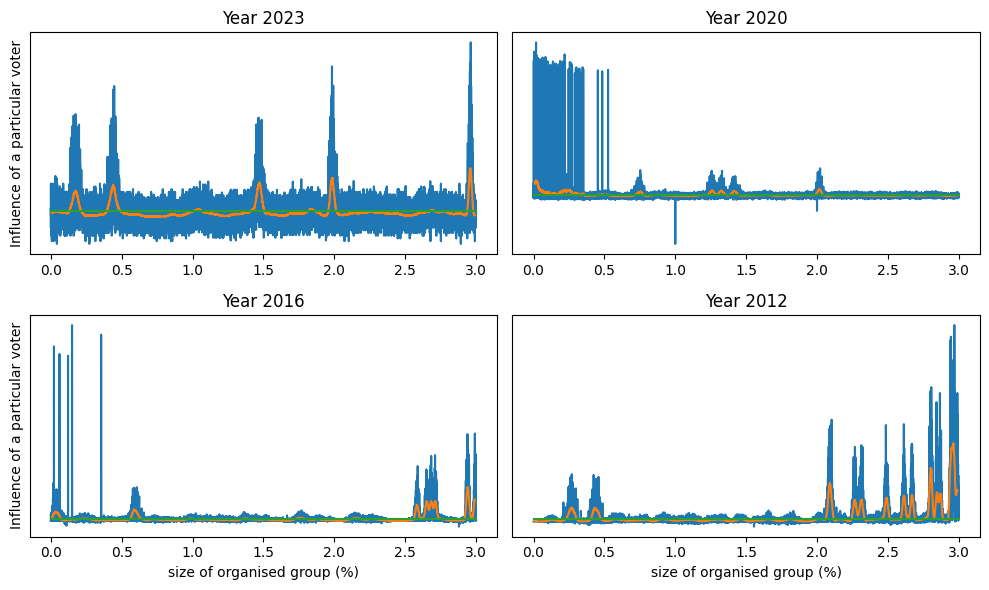

In [7]:
# preps for viewing all four 

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.ravel() #flatens indexing
show2023(axs)
show2020(axs)
show2016(axs)
show2012(axs)
plt.tight_layout()  # Adjust subplot spacing for better visibility
plt.show()

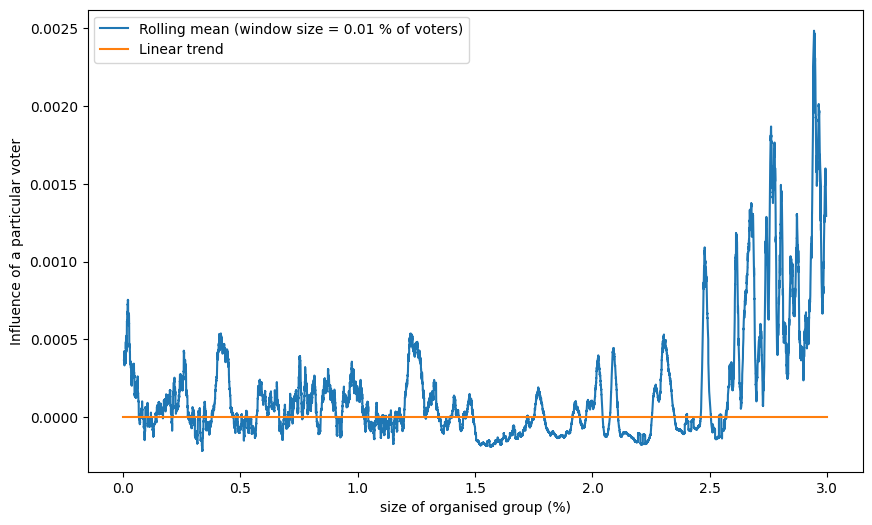

In [14]:
# PRIEMER VSETKYCH VOLIEB
df_list = [pd.read_csv(f"./vis_data/unweighted-vis-1m-{year}.csv") for year in constants.years]

x_values = (df_list[0]['samples'] / 1000000) * 100

plt.figure(figsize=(10, 6))

y_values_list = [df['diff'] for df in df_list]

y_values = (sum(y_values_list)) / len(y_values_list)
y_vals =  y_values - (3 * x_values)

y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=100, center=True).mean()

x = np.arange(0, 4)
y = 3 * x

# plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")

plt.plot(x, y * 0, label='Linear trend')

# plt.yticks([])


plt.xlabel('size of organised group (%)')
plt.ylabel('Influence of a particular voter')
# plt.title(f'Difference of seat distribution function (average through all years)')

plt.legend()


In [15]:
for year in [2023, 2020, 2016, 2012, 2010, 2006, 2002, 1998, 1994]:
    raw2visualisable(f"1m-{year}.csv", weighted=True, only_electable=False, year=year)


TypeError: 'NoneType' object is not iterable